In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
N = 100
alpha = 0.95

Напишем функцию, которая будет строить график, где для каждого $n \leqslant 100$ будет изображен доверительный интервал уровня доверия $\alpha$ для параметра $\theta$, а также истинное значение параметра $\theta$.

In [3]:
def build_conf_interval(sample, left_border, right_border, 
                        theta, ylims=None, start=1):
    plt.figure(figsize=(12, 6))
    x = range(start, N + 1)
    plt.fill_between(x, [left_border(sample[:n]) for n in x], 
                     [right_border(sample[:n]) for n in x], 
                     label="Confidence interval")
    if ylims:
        plt.ylim(ylims[0], ylims[1])
    plt.plot(x, [theta] * len(x), 'r', label=r"real $\theta$")
    plt.legend(loc="best")
    plt.xlabel("n")
    plt.ylabel(r"$\theta$")
    plt.title(r"""Доверительный интервал уровня 
    доверия 0.95 для параметра $\theta$ в зависимости от размера выборки""")
    plt.show();

Также напишем функцию, которая для заданного распределения и доверительного интервала оценивает ворятность попадания истинного значения $\theta$ в данный интервал. Для этого мы сгенерируем 10000 выборок размера 100 (что является большим количеством и будет достаточным для оценки) и для каждой проверим попадает ли истинное значение параметра в построенный по данной выборке интервал. После этого найдем процент выборок, для которых параметр попал в интервал и таким образом оценим вероятность.

In [4]:
def count_probability(rv, left_border, right_border, theta):
    count = 0
    M = 10000
    for _ in range(M):
        sample = rv.rvs(N)
        if left_border(sample) <= theta <= right_border(sample):
            count += 1
    return count / M

# Равномерное распределение

Создадим выборку размера $N = 100$ из равномерного распределения на отрезке $[0, \theta]$ и возьмем $\theta = 10$.

In [5]:
theta = 10
uniform_rv = sts.uniform(loc=0, scale=theta)
uniform_sample = uniform_rv.rvs(N)

## Доверительный интервал через $\overline{X}$

Доверительный интервал для параметра $\theta$ уровня доверия $\alpha$, использовав статистику $\overline{X}$, равен:
$$\left(\frac{\overline{X}}{\frac{1}{2} + \frac{1}{\sqrt{12 n (1 - \alpha)}}}, 
\frac{\overline{X}}{\frac{1}{2} - \frac{1}{\sqrt{12 n (1 - \alpha)}}}\right).$$
Единственное замечание, что при $\frac{1}{2} \leqslant \frac{1}{\sqrt{12 n (1 - \alpha)}}$ правый конец нужно брать равным $+\infty$. Кроме того, данный интервал не является точным.

Напишем функции, которые будут по выборке считать левый и правый конец данного доверительного интервала.

In [6]:
def uniform_mean_left(sample):
    return np.mean(sample) / (0.5 + 1 / 
            ((12 * len(sample) * (1 - alpha)) ** 0.5))

def uniform_mean_right(sample):
    if 0.5 < 1 / ((12 * len(sample) * (1 - alpha)) ** 0.5):
        return 1000000 # будем считать это бесконечностью
    return np.mean(sample) / (0.5 - 1 / 
            ((12 * len(sample) * (1 - alpha)) ** 0.5))

Построим график для доверительного интервала уровня доверия $\alpha = 0.95$.

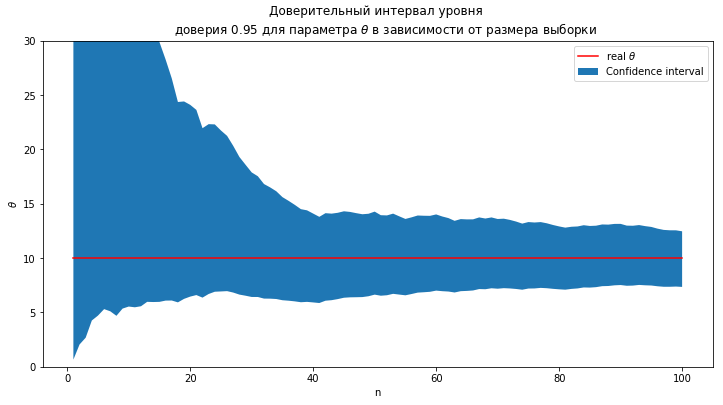

In [7]:
build_conf_interval(uniform_sample, 
                    uniform_mean_left, uniform_mean_right, theta, [0, 30])

А также оценим вероятность попадания истинного значения параметра $\theta$ в данный интервал.

In [8]:
count_probability(uniform_rv, uniform_mean_left, uniform_mean_right, theta)

1.0

## Доверительный интервал через $X_{(n)}$

Доверительный интервал для параметра $\theta$ уровня доверия $\alpha$, использовав статистику $X_{(n)}$, равен:
$$\left(\frac{X_{(n)}}{\left(\frac{1 + \alpha}{2}\right)^{\frac{1}{n}}}, 
\frac{X_{(n)}}{\left(\frac{1 - \alpha}{2}\right)^{\frac{1}{n}}}\right).$$
Данный интервал является точным.

Аналогично строим график и оценивам вероятность попадания.

In [9]:
def uniform_last_left(sample):
    return np.max(sample) / (((1 + alpha) / 2) ** (1 / len(sample)))

def uniform_last_right(sample):
    return np.max(sample) / (((1 - alpha) / 2) ** (1 / len(sample)))

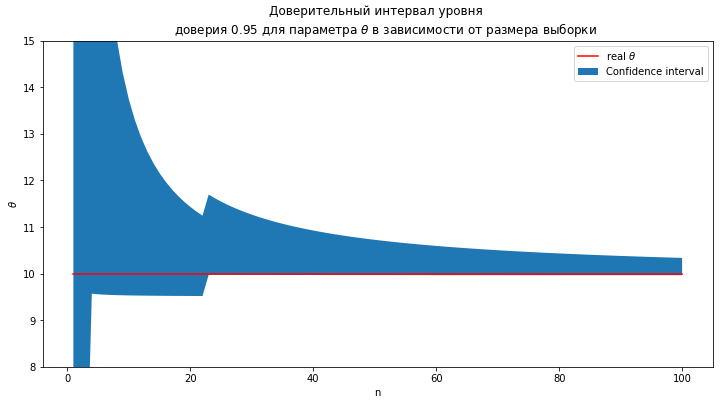

In [10]:
build_conf_interval(uniform_sample, 
                    uniform_last_left, uniform_last_right, theta, [8, 15])

In [11]:
count_probability(uniform_rv, uniform_last_left, uniform_last_right, theta)

0.9526

## Доверительный интервал через $X_{(1)}$

Доверительный интервал для параметра $\theta$ уровня доверия $\alpha$, использовав статистику $X_{(1)}$, равен:
$$\left(\frac{X_{(1)}}{1 - \left(\frac{1 - \alpha}{2}\right)^{\frac{1}{n}}}, 
\frac{X_{(1)}}{1 - \left(\frac{1 + \alpha}{2}\right)^{\frac{1}{n}}}\right).$$
Данный интервал является точным.

Аналогично строим график и оценивам вероятность попадания.

In [12]:
def uniform_first_left(sample):
    return np.min(sample) / (1 - ((1 - alpha) / 2) ** (1 / len(sample)))

def uniform_first_right(sample):
    return np.min(sample) / (1 - ((1 + alpha) / 2) ** (1 / len(sample)))

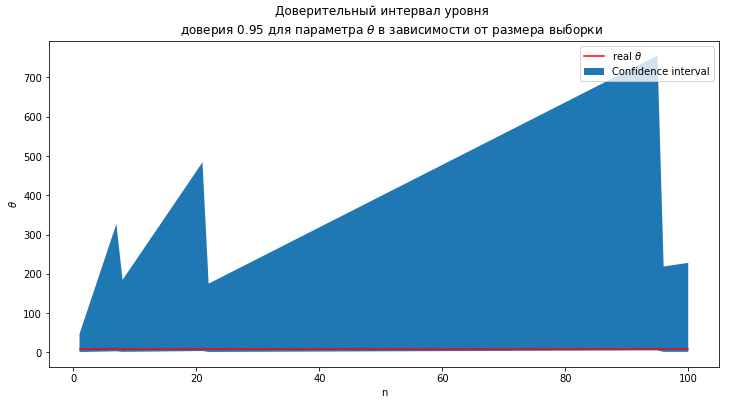

In [13]:
build_conf_interval(uniform_sample, 
                    uniform_first_left, uniform_first_right, theta)

In [14]:
count_probability(uniform_rv, uniform_first_left, uniform_first_right, theta)

0.952

# Распределение Коши

Сгенерируем выборку размера $N = 100$ из распределения Коши с параметром $\theta$ и возьмем $\theta = 10$.

In [15]:
theta = 10
cauchy_rv = sts.cauchy(loc=theta)
cauchy_sample = cauchy_rv.rvs(N)

Асимптотический доверительный интервал для параметра $\theta$ уровня доверия $\alpha$ равен:
$$\left(\hat{\mu} - \frac{\pi  u_{\frac{1 + \alpha}{2}}}{2 \sqrt{n}}, 
\hat{\mu} + \frac{\pi  u_{\frac{1 + \alpha}{2}}}{2 \sqrt{n}}\right),$$
где $\hat{\mu}$ - выборочная медиана, а $u_{\frac{1 + \alpha}{2}}$ - $\frac{1 + \alpha}{2}$-aя квантиль стандартного нормального распределения, то есть если $\xi \sim N(0, 1)$, то $P\left(\xi \leqslant u_{\frac{1 + \alpha}{2}}\right) = F_{\xi}\left(u_{\frac{1 + \alpha}{2}}\right) = \frac{1 + \alpha}{2}$.
Данный интервал является точным.

Из табличных данных для нашего $\alpha = 0.95$ получаем $u_{\frac{1 + \alpha}{2}} = u_{0.975} = 1.96$. 

In [16]:
quantile = 1.96

Аналогично строим график и оценивам вероятность попадания.

In [17]:
def cauchy_left(sample):
    return np.median(sample) - np.pi * \
        quantile / 2 / (len(sample) ** 0.5)

def cauchy_right(sample):
    return np.median(sample) + np.pi * \
        quantile / 2 / (len(sample) ** 0.5)

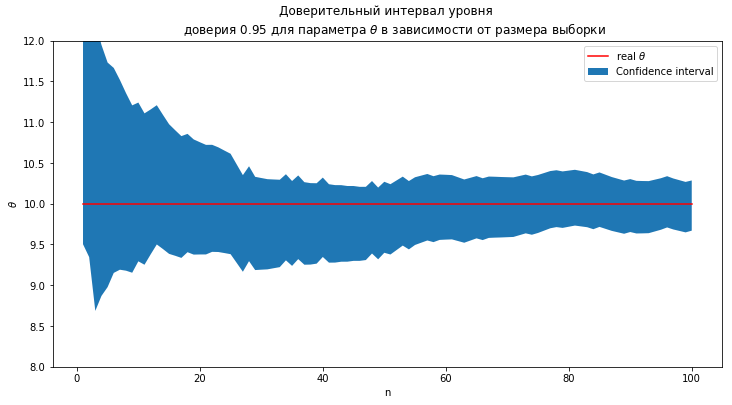

In [18]:
build_conf_interval(cauchy_sample, cauchy_left, cauchy_right, theta, [8, 12])

In [19]:
count_probability(cauchy_rv, cauchy_left, cauchy_right, theta)

0.9486

# Распределение Пуассона

Сгенерируем выборку размера $N = 100$ из распределения Пуассона с параметром $\theta$ и возьмем $\theta = 10$.

In [20]:
theta = 10
pois_rv = sts.poisson(mu=theta)
pois_sample = pois_rv.rvs(N)

Асимптотический доверительный интервал для параметра $\theta$ уровня доверия $\alpha$ равен:
$$\left(\overline{X} - \sqrt{\frac{\overline{X}}{n}} u_{\frac{1 + \alpha}{2}}, 
\overline{X} + \sqrt{\frac{\overline{X}}{n}} u_{\frac{1 + \alpha}{2}}\right),$$
где $u_{\frac{1 + \alpha}{2}}$ - $\frac{1 + \alpha}{2}$-aя квантиль стандартного нормального распределения. Данный интервал является точным.

Аналогично строим график и оценивам вероятность попадания.

In [21]:
def pois_left(sample):
    return np.mean(sample) - np.sqrt(np.mean(sample) / len(sample)) * \
        quantile

def pois_right(sample):
    return np.mean(sample) + np.sqrt(np.mean(sample) / len(sample)) * \
        quantile

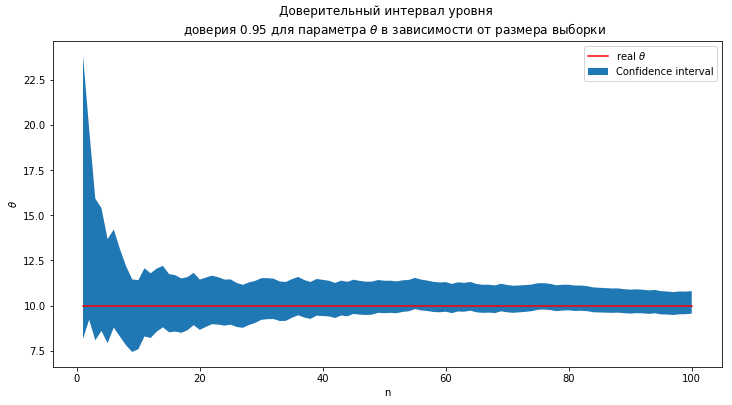

In [22]:
build_conf_interval(pois_sample, pois_left, pois_right, theta)

In [23]:
count_probability(pois_rv, pois_left, pois_right, theta)

0.9471

# Гамма распределение

Сгенерируем выборку размера $N = 100$ из распределения Пуассона с параметрами $\theta$ и $\lambda$ и возьмем $\theta = 10$, а $\lambda = 3$.

In [24]:
theta = 10
lambd = 3
gamma_rv = sts.gamma(a=theta, scale=1/lambd)
gamma_sample = gamma_rv.rvs(N)

## Случай, когда $\lambda$ известно

Асимптотический доверительный интервал для параметра $\theta$ уровня доверия $\alpha$, при известном $\lambda$, равен:
$$\left(\lambda \overline{X} - \sqrt{\frac{\lambda \overline{X}}{n}} u_{\frac{1 + \alpha}{2}}, 
\lambda \overline{X} + \sqrt{\frac{\lambda \overline{X}}{n}} u_{\frac{1 + \alpha}{2}}\right),$$
где $u_{\frac{1 + \alpha}{2}}$ - $\frac{1 + \alpha}{2}$-aя квантиль стандартного нормального распределения. Данный интервал является точным.

Возьмем $\lambda = 3$ и аналогично предыдущим случаям нарисуем график и оценим вероятность.

In [25]:
def gamma_left(sample):
    return lambd * np.mean(sample) - np.sqrt(lambd * np.mean(sample) / len(sample)) * \
        quantile

def gamma_right(sample):
    return lambd * np.mean(sample) + np.sqrt(lambd * np.mean(sample) / len(sample)) * \
        quantile

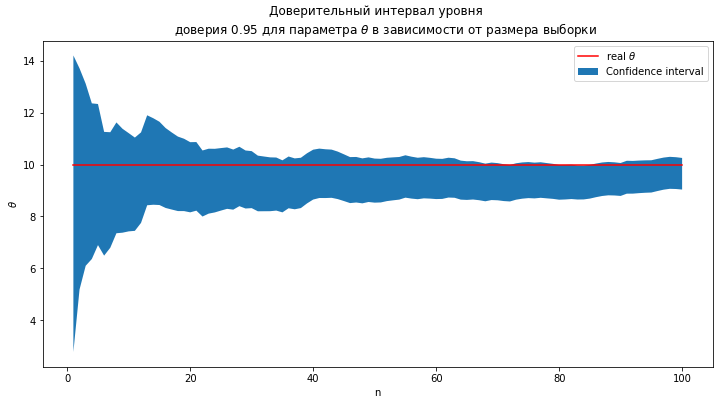

In [26]:
build_conf_interval(gamma_sample, gamma_left, gamma_right, theta)

In [27]:
count_probability(gamma_rv, gamma_left, gamma_right, theta)

0.9482

## Случай, когда $\lambda$ неизвестно

Асимптотический доверительный интервал для параметра $\theta$ уровня доверия $\alpha$, при неизвестном $\lambda$ равен:
$$\left(\hat{\lambda} \overline{X} - \sqrt{\frac{\hat{\lambda} \overline{X}}{n}} u_{\frac{1 + \alpha}{2}}, 
\hat{\lambda} \overline{X} + \sqrt{\frac{\hat{\lambda} \overline{X}}{n}} u_{\frac{1 + \alpha}{2}}\right),$$
где $\hat{\lambda} = \frac{\overline{X}}{\overline{X^2} - \left(\overline{X}\right)^2}$ - оценка параметра $\lambda$ с помощью метода моментов.

Аналогично предыдущим случаям нарисуем график и оценим вероятность. Для размера выборки 1 оценка параметра $\lambda$ отсутсвует, поэтому будем начинать график с $n = 2$.

In [28]:
def gamma_left_unknown(sample):
    return lambd * np.mean(sample) - np.sqrt(lambd * np.mean(sample) / len(sample)) * \
        quantile

def gamma_right_unknown(sample):
    return lambd * np.mean(sample) + np.sqrt(lambd * np.mean(sample) / len(sample)) * \
        quantile

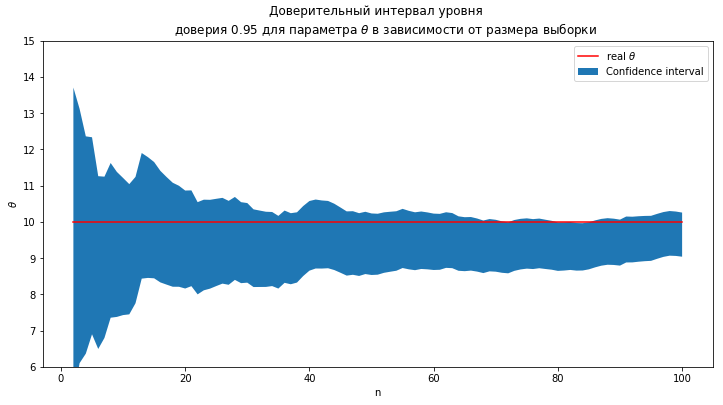

In [29]:
build_conf_interval(gamma_sample, gamma_left_unknown, 
                    gamma_right_unknown, theta, [6, 15], start=2)

In [30]:
count_probability(gamma_rv, gamma_left_unknown, gamma_right_unknown, theta)

0.9531

Вывод: как видно из графиков при любом распределении истинное значение $\theta$ почти всегда попадает в доверительный интервал уровня доверия 0.95 при любом размере выборки. Это значит, что мы правильно нашли наши интервалы. Кроме того, даже для асимптотических доверительных интервалах истинное значение попадает в интервал. Единственный асимптотический доверительный интервал, для которого истинное значение редко попадает в данный интервал, это интервал для параметра $\theta$ при неизвестном $\lambda$. Это происходит из-за того, что данный интервал явяляется асимптотическим и тем, что мы берем оценку $\lambda$, а не ее точное значение, которое для малых размеров выборки также дает не точный результат. 

Заметим также, что при малых размерах выборки длина интервала может оказаться очень большой, что и не удивительно, так как мы имеем мало данных для оценивания параметра. Также можно заметить, что доверительный интервал для параметра $\theta$ из равномерного распределения $[0, \theta]$, использовавший статистику $X_{(1)}$ имеет очень большую длину, что и неудивительно, так как мы пытаемся оценить параметр, который является максимальным значением случайной величины, через минимальное значение по выборке, поэтому в данном случае использовать такой интервал не эффективно. Все же остальные интервалы сужаются при увеличении размера выборки и в среднем имеют длину 3-4 при $n = 100$, что является довольно неплохой оценкой истинного параметра $\theta = 10$. 

Также мы проверили, что для всех доверительных интервалов действительно вероятность попадания истинного значения равна 0.95, так как оцениваемая вероятность по 10000 выборкам давала всегда результат близкий к 0.95. Причем это было выполнено и для всех асимптотических доверительных интервалов, кроме интервала для гамма распределения с неизвестным $\lambda$, который как было объяснено выше медленно стремится к вероятности 0.95, поэтому можно видеть, что некоторые асимптотические доверительные интервалы дают плохие результаты на конечных относительно небольших выборках и поэтому их не следует использовать. Также в случае равномерного распределения и доверительного интервала черех $\overline{X}$, так как данный интервал являлся не точным, мы увидели, что оцениваемая вероятность равнялась 1, что не удивительно, так как данный инетрвал гарантирует вероятность попадания истинного значения больше, чем 0.95.